Dr. Jesús Martí Gavilá. Departamento de Ingeniería Cartográfica, Geodesia y fotogrametría
<font color="blue" ><h1 align=center>PRÁCTICA 10</h1> <p> <h1 align=center> EJERCICIO PRÁCTICO CON GOOGLE EARTH ENGINE PARA PYTHON</h1></font>

<a href="http://www.upv.es/titulaciones/GTI/indexc.html"><img src = "http://www.upv.es/imagenes/marcaUPVN1.png" width =200 ></a>

<h2 align=center>Grado Tecnologías Interactivas | Tecnologías de la Información Geográfica</h2>


<div class="alert alert-block alert-info" style="margin-top: 20px">
 <b><H2>OBJETIVOS</h2></b>  <div align="justify">Utilizar la plataforma de Google Earth Engine donde el alumno, de forma autónoma, obtenga los valores del Indice Medioambiental asignado, en función de dos constelaciones de satélites y se plasmado en una WebMapping</div>
<h2>Resultados:</h2>   
    <ul>
        <li>Crear un WebMapping con los resultados de los índices cálculados </li>
        <li>Exportar las imágenes en formato Geotiff a Drive, de la zona de estudio</li>
    </ul>


<h2><font color="blue" >Librerías y Activación GEE</font></h2><p>

Cargar las librerías necesarias y activar la plataforma de GEE en la que previamenete el usuario deberá haberse registrado (solo se realiza una única vez por maquina)

In [3]:
import folium
from folium import plugins
import ee
import branca
import branca.colormap as cm
ee.Authenticate()
ee.Initialize()

ModuleNotFoundError: No module named 'folium'

In [5]:
# Función de GEE predefinida para añadir capas con Folium

def add_ee_layer (self, ee_imagen, parametros, nombre):
    map_id = ee.Image(ee_imagen).getMapId(parametros)
    folium.raster_layers.TileLayer(
        tiles=map_id['tile_fetcher'].url_format, 
        attr = 'Alvaro-Pablo-Nordin', #Indicar el nombre de los componentes del grupo
        name = nombre,
        overlay = True, # Permite la superposición
        control = True # Permite que aparezca la capa o no en el layer control
        ).add_to(self)

# Con esto creamos un método propio llamado addLayer que llamara a la función add_ee_layer
folium.Map.addLayer = add_ee_layer

NameError: name 'folium' is not defined

In [6]:
# Leyenda
colormap = cm.StepColormap(['red','yellow','green','blue'], index=[-1,-0.3,0,0.2,1],vmin=-1, vmax=1, max_labels=5,caption='Valores del NDWI y MNDWI',tick_labels=[])

# mapa.add_child(colormap) ............Utilizar esta expresión para añadir la rampa al mapa
colormap

NameError: name 'cm' is not defined

<h1 align=center><font color="green" >Estudio de Indices de AGUA con Google Earth Engine.</font></h1><p>
    
<h2 align=center> Caso de estudio </h2><p>
<h4 align=center> 
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</h4>

<div align="justify"> </div>El método Índice de agua de diferencia normalizada (NDWI, por sus siglas en inglés) es un índice que sirve para definir y monitorizar los cambios de contenido en aguas superficiales. 


<h2><font color="red" >TAREA 1</font></h2><p>
<h3> Calcular el Indice con imágenes satélite de la plataformas correspondiente al grupo asignado</h3> <p>
Se calculará el Indice con las imágenes satélite de 2 plataformas para un periodo de tiempo establecido y un lugar de estudio, en función del grupo de estudio asignado.<p>
Se realizará un WebMap con las 2 capas resultantes, aplicando la rampa de colores índicada anteriormente y se exportará en formato Geotiff, al Drive del grupo, las imagenes correspondientes a las zonas de estudio indicadas.
<p><h3 align=center> Índice de Agua de Diferencia Normalizada (NDWI). McFeeters, 1996</h3> <p><p>
<h3 align=center>Índice de Agua de Diferencia Normalizada Modificado (MNDWI). Xu, 2006</h3><p>

<h2 align=center>Valores rampa de colores</h2>


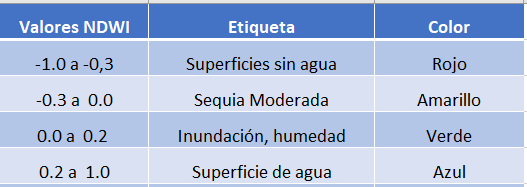

In [40]:
#SENTINEL Y LANDSAT


# Colección de imágenes de Sentinel con una nubosidad inferior al 20% y la medía calculada de los pixels
sentinel= (ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')
                  .filterDate('2022-03-20', '2022-06-21')
                  .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE',20)).mean()) #el filtro de nubosidad varía según imagen

landsat= (ee.ImageCollection('LANDSAT/LE07/C02/T1_L2')
                  .filterDate('2022-03-20', '2022-06-21')
                  .filter(ee.Filter.lt('CLOUD_COVER',20)).mean())

#GENERER MAPAA EN MI PRACTICA

# Funciones de calculo NDWI y dsavi
def NDWI1(image):
    NDWI1 = image.expression('float((GREEN-NIR)/(GREEN+NIR))',{
        'GREEN' : image.select("B3").multiply(0.0001),
        'NIR' : image.select("B8").multiply(0.0001),

    })
    return NDWI1

def NDWI2(image):
    NDWI2 = image.expression('float((GREEN-NIR)/(GREEN+NIR))',{
        'GREEN' : image.select("SR_B2").multiply(0.0000275),
        'NIR' : image.select("SR_B4").multiply(0.0000275),

    })
    return NDWI2
          


# Parámetros de visualización de la imágen
vis_NDWI1 ={
    'max': 1,
    'min': 0,
    # Paleta de colores standar de GEE
    'palette' : ['FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718','74A901', '66A000', '529400', '3E8601', '207401', '056201',
               '004C00', '023B01', '012E01', '011D01', '011301']} 


# Llamada a las funciones
NDWI_sentinel = NDWI(sentinel)
NDWI_landsat = NDWI(landsat)

# Exportar imagen a Google Drive. Configuración parámetros de salida
geometry = ee.Geometry.Rectangle([-0.40, 38.9, -0.20, 39.1]) # Coordenadas geográficas minima y maxima de la imagen a exportar
task_config = {
        'region': geometry,
        'fileFormat': 'GeoTIFF',
        'fileNamePrefix': 'alvaronordin-PABLO',#ESTE ES EL NOMBRE AQUI PONGO ALVARO
        'folder':'gee-datos',
        'scale': 20,      # Resolución en metros del pixel 
        'crs': 'EPSG:4326',
        'image': NDWI_sentinel,
        'description': 'Imagen procesada NDWI'
    }
ee.batch.Export.image.toDrive(**task_config).start()




In [52]:
#SENTINEL Y LANDSAT


# Colección de imágenes de Sentinel con una nubosidad inferior al 20% y la medía calculada de los pixels
#sentinel= (ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')
                  #.filterDate('2022-03-20', '2022-06-21')
                  #.filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE',20)).mean()) #el filtro de nubosidad varía según imagen

landsat= (ee.ImageCollection('LANDSAT/LE07/C02/T1_L2')
                 .filterDate('2022-03-20', '2022-06-21')
                  .filter(ee.Filter.lt('CLOUD_COVER',20)).mean())

#GENERER MAPAA EN MI PRACTICA

# Funciones de calculo NDWI y dsavi
def NDWI(image):
    NDWI = image.expression('float((GREEN-NIR)/(GREEN+NIR))',{
        'GREEN' : image.select("SR_B2").multiply(0.0000275),
        'NIR' : image.select("SR_B4").multiply(0.0000275),

    })
    return NDWI


# Parámetros de visualización de la imágen
vis_NDWI ={
    'max': 1,
    'min': 0,
    # Paleta de colores standar de GEE
    'palette' : ['FFFFFF', 'CE7E45', 'DF923D', 'F1B555', 'FCD163', '99B718','74A901', '66A000', '529400', '3E8601', '207401', '056201',
               '004C00', '023B01', '012E01', '011D01', '011301']} 


# Llamada a las funciones
NDWI_sentinel = NDWI(sentinel)
NDWI_landsat = NDWI(landsat)

# Exportar imagen a Google Drive. Configuración parámetros de salida
geometry = ee.Geometry.Rectangle([-0.40, 38.9, -0.20, 39.1]) # Coordenadas geográficas minima y maxima de la imagen a exportar
task_config = {
        'region': geometry,
        'fileFormat': 'GeoTIFF',
        'fileNamePrefix': 'alvaronordin-PABLO',#ESTE ES EL NOMBRE AQUI PONGO ALVARO
        'folder':'gee-datos',
        'scale': 20,      # Resolución en metros del pixel 
        'crs': 'EPSG:4326',
        'image': NDWI_landsat,
        'description': 'Imagen procesada NDWI'
    }
ee.batch.Export.image.toDrive(**task_config).start()

# Exportar imagen a Google Drive. Configuración parámetros de salida
geometry = ee.Geometry.Rectangle([-0.40, 38.9, -0.20, 39.1]) # Coordenadas geográficas minima y maxima de la imagen a exportar
task_config = {
        'region': geometry,
        'fileFormat': 'GeoTIFF',
        'fileNamePrefix': 'alvaronordin-PABLO2',#ESTE ES EL NOMBRE AQUI PONGO ALVARO
        'folder':'gee-datos',
        'scale': 20,      # Resolución en metros del pixel 
        'crs': 'EPSG:4326',
        'image': NDWI_sentinel,
        'description': 'Imagen procesada NDWI2'
    }
ee.batch.Export.image.toDrive(**task_config).start()

# Ejemplo aplicación de intervalos a imagenes.
sld_intervalos = """
    <RasterSymbolizer>
        <ColorMap type="intervals" extended="false" >
            <ColorMapEntry color="#0000ff" quantity="-1.0" label="Zonas estables"/>
            <ColorMapEntry color="#00ff00" quantity="-0.3" label="Gravedad baja" />
            <ColorMapEntry color="#FFFF00" quantity="0.0" label="Gravedad Moderada baja" />
            <ColorMapEntry color="#00913f" quantity="0.2" label="inundacion humedad" />
            <ColorMapEntry color="#0000ff" quantity="1.0" label="Superficie agua" />
        </ColorMap>
    </RasterSymbolizer>"""

# Crear y añadir elementos al mapa
mapa_intervalo = folium.Map(location=[0.4437,33.1849], zoom_start=12)
mapa_intervalo.addLayer(NDWI_landsat.sldStyle(sld_intervalos),None,'SLD intervalos')
mapa_intervalo.addLayer(NDWI_sentinel.sldStyle(sld_intervalos),None,'SLD intervalos')
folium.LayerControl().add_to(mapa_intervalo)
mapa_intervalo




EEException: Image.select: Pattern 'SR_B4' did not match any bands.

In [21]:
# mapa dual
mapa_dual = plugins.DualMap(location=[0.4437,33.1849], tiles=None, zoom_start=12)

# Mapas Base
folium.TileLayer('Stamen Terrain').add_to(mapa_dual.m1)
folium.TileLayer('CartoDB Positron').add_to(mapa_dual.m2)

# Para añadir una imagen aun mapa utilizar el plugin .add_to(mapa_dual.m1) o .add_to(mapa_dual.m2)
mapa_dual.m1.addLayer(NDWI_sentinel,vis_NDWI, "NDWI")
mapa_dual.m2.addLayer(NDWI_landsat,vis_NDWI, "NDWI")
# Añadir control de mapas
folium.LayerControl().add_to(mapa_dual)

# Guardar mapas
mapa_dual.save("Medio_Ambiente.html")

mapa_dual